# 1. Import Modules

In [409]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
import understat


# 2. Webscrape

## Reading data..

In [410]:
#We do not select season 2016-17 due to it having no column: now_cost
#Difference between raw and clean data is the team index. Raw data has, but clean data does not. 

raw_data = {}
raw_frames = []
clean_data = {}
clean_frames = []

season = ['2017-18','2018-19','2019-20','2020-21']

for year in season:
    clean_data[year] = pd.read_csv('data/' + year + '/cleaned_players.csv')

for key, df in clean_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['now_cost'] = df['now_cost']/10
    df['ppv'] = df['total_points']/df['now_cost']
    df['year'] = key[:4]
    clean_frames.append(df)

for year in season:
    raw_data[year] = pd.read_csv('data/' + year + '/players_raw.csv')

for key, df in raw_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['year'] = key[:4]
    raw_frames.append(df)


In [411]:
#Only contains the data for 2021 season
#players_data = pd.read_csv('players_understat.csv')


#Map team_id with team_name
team_data = pd.read_csv('data/master_team_list.csv')
team_data['season'] = team_data['season'].map(lambda x: x[:4])
team_data.rename(columns ={'season':'year'},inplace=True)


#Contains data for every season
#CSV was downloaded from Google Colab notebook.
players_data = pd.read_csv('data/players_stats.csv')
players_data.drop(['Unnamed: 0','id'],axis=1,inplace=True)


In [412]:
#Concat Dataframes in List 
raw_result = pd.concat(raw_frames).reset_index()
clean_result = pd.concat(clean_frames).drop(['element_type'],axis=1).reset_index()

raw_result.columns
raw_result[['year','first_name','second_name','element_type','team']] #Columns we need.
team_data.columns

#Join columns we need, with the team_data.
join_1 = raw_result.join(team_data.set_index(['year','team']), on = ['year','team'])[['year','first_name','second_name','element_type','team_name']]

#Merge join_1 with clean_result
join_df=clean_result.merge(join_1,on=['year','first_name','second_name'])
#join_df=join_df.merge(players_data,on=['year'])
#clean_result.join(join_1.set_index(['year','first_name','second_name']), on=['year','first_name','second_name']).reset_index()


def position_name(x):
    if x==1:
        return 'GK'
    elif x==2:
        return 'DEF'
    elif x==3:
       return 'MID'
    else:
        return 'FWD'

#Adding columns to join_df df

join_df.drop(['index'], axis=1, inplace=True)
join_df['position']=join_df.apply(lambda x:position_name(x['element_type']),axis=1)
join_df['player_name'] = join_df['first_name'] + ' ' + join_df['second_name'] 
join_df['year']=join_df['year'].astype('int64')

#ame(x[#'element_type']), join_df.apply(lambda x: x['now_cost']/) ##Find the difference## between eppv and ppv=1)
#join_df['eff_ppv'] =  bn
#Join the raw and clean result 
#result = clean_result.join(raw_result, on = '') 

#Change year to INT
#result.year = result.year.astype('int64')

#result[result.year==2019].head(10)

## Create players_df dataframe:

In [413]:
#Create players_df with selected columns.
players_data[players_data.player_name=='Harry Kane']
players_df=players_data[['year','player_name','team_title','games','time','xG','xA','shots','key_passes','npg','npxG','xGChain','xGBuildup']]
players_df.head(20)


,year,player_name,team_title,games,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup
0,2017,Mohamed Salah,Liverpool,36,2954,25.136503,8.344478,143,62,31,23.614165,35.301465,5.898578
1,2017,Harry Kane,Tottenham,37,3094,26.859891,3.820441,183,34,28,24.576384,28.515266,7.961634
2,2017,Sergio Agüero,Manchester City,25,1985,18.568618,6.533230,95,39,17,15.523943,23.707815,7.512719
3,2017,Jamie Vardy,Leicester,37,3269,15.266967,3.630826,70,33,15,10.699991,15.584634,1.977742
4,2017,Raheem Sterling,Manchester City,33,2594,18.829967,8.844116,87,55,17,18.068798,33.656717,12.149657
5,2017,Romelu Lukaku,Manchester United,34,2869,15.468221,5.473206,86,33,16,14.707052,24.643032,7.161955
6,2017,Roberto Firmino,Liverpool,37,2814,10.763707,7.678425,84,56,14,10.002539,27.837452,12.625403
7,2017,Alexandre Lacazette,Arsenal,32,2235,13.831241,4.839555,67,36,12,12.308903,20.898552,6.228630
8,2017,Gabriel Jesus,Manchester City,29,1692,15.366189,2.307675,55,18,13,13.843851,20.561473,6.514697
9,2017,Son Heung-Min,Tottenham,37,2315,11.021603,6.592509,75,38,12,11.021603,22.617972,6.259737


In [415]:
players_df[players_df.player_name.str.contains('Heung')] ##returns Son Heung-Min

,year,player_name,team_title,games,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup
9,2017,Son Heung-Min,Tottenham,37,2315,11.021603,6.592509,75,38,12,11.021603,22.617972,6.259737
530,2018,Son Heung-Min,Tottenham,31,2061,8.363065,3.965311,74,33,12,8.363065,16.200825,6.026785
1037,2019,Son Heung-Min,Tottenham,30,2511,9.701705,6.721727,81,41,11,8.940536,18.800012,6.514013
1538,2020,Son Heung-Min,Tottenham,37,3139,11.023287,9.512992,68,75,16,10.262118,20.671916,6.608751
2073,2021,Son Heung-Min,Tottenham,4,346,0.973576,0.184433,12,4,2,0.973576,1.210903,0.327409


In [416]:
join_df[join_df.player_name.str.contains('Heung')]

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,red_cards,yellow_cards,selected_by_percent,now_cost,ppv,year,element_type,team_name,position,player_name
9,Heung-Min,Son,12,8,178,2292,18,588.2,725.8,1177.0,...,0,0,14.0,8.3,21.445783,2017,3,Spurs,MID,Heung-Min Son
673,Heung-Min,Son,12,8,159,2033,23,508.0,690.6,1002.0,...,1,2,10.6,8.6,18.488372,2018,3,Spurs,MID,Heung-Min Son
1288,Heung-Min,Son,11,13,169,2478,32,606.1,800.6,1144.0,...,2,0,8.5,9.7,17.422680,2019,3,Spurs,MID,Heung-Min Son
1942,Heung-Min,Son,17,11,228,3119,36,1049.9,1052.2,1046.0,...,0,0,44.2,9.6,23.750000,2020,3,Spurs,MID,Heung-Min Son


## Creating Final Dataframe (fpl_df):

In [136]:
#Final_df is our  df to be used for analysis.
final_df=join_df.merge(players_df,how='inner',on=['year','player_name'])

#Verification
final_df[final_df.player_name=='Harry Kane']
final_df.columns

#Clean final_df
fpl_df = final_df[['year','player_name','team_title','position','goals_scored','assists','total_points','goals_conceded','creativity','influence','threat','bonus','bps','ict_index','clean_sheets','now_cost','ppv']]

#Merge with the players stats from Understat
players_df = players_df.drop(columns='team_title')
fpl_df=fpl_df.merge(players_df,how='inner',on=['year','player_name'])

In [138]:
fpl_df.head(10)

,year,player_name,team_title,position,goals_scored,assists,total_points,goals_conceded,creativity,influence,...,games,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup
0,2017,Mohamed Salah,Liverpool,MID,32,12,303,29,942.5,1496.2,...,36,2954,25.136503,8.344478,143,62,31,23.614165,35.301465,5.898578
1,2017,Raheem Sterling,Manchester City,MID,18,17,229,23,838.2,969.8,...,33,2594,18.829967,8.844116,87,55,17,18.068798,33.656717,12.149657
2,2017,Harry Kane,Tottenham,FWD,29,2,217,34,502.1,1214.4,...,37,3094,26.859891,3.820441,183,34,28,24.576384,28.515266,7.961634
3,2017,Kevin De Bruyne,Manchester City,MID,8,18,209,22,1744.2,1146.6,...,37,3103,5.401730,13.101720,93,105,8,5.401730,33.500915,22.899964
4,2017,Christian Eriksen,Tottenham,MID,11,10,199,33,1487.0,1072.6,...,37,3239,7.245939,11.893049,96,95,10,7.245939,27.006113,15.511445
5,2017,Riyad Mahrez,Leicester,MID,12,13,195,51,924.0,966.0,...,36,2977,6.613531,7.551042,74,57,12,6.613531,15.855961,6.466544
6,2017,Jamie Vardy,Leicester,FWD,20,2,183,57,439.9,822.8,...,37,3269,15.266967,3.630826,70,33,15,10.699991,15.584634,1.977742
7,2017,Roberto Firmino,Liverpool,FWD,15,8,181,32,834.5,951.0,...,37,2814,10.763707,7.678425,84,56,14,10.002539,27.837452,12.625403
8,2017,Leroy Sané,Manchester City,MID,10,15,179,22,891.3,842.4,...,32,2421,6.241075,9.048877,56,58,10,6.241075,19.683995,11.898687
9,2017,César Azpilicueta,Chelsea,DEF,2,6,175,38,535.7,967.4,...,37,3330,1.382491,4.652554,13,32,2,1.382491,15.965326,12.362422


# 3. Analysis

### PPV (mean and std)

In [7]:
#PPV
df1 = fpl_df.groupby(by=['year','position']).apply(lambda x: x.sort_values(["ppv"], ascending=False)).reset_index(drop=True)
ppv_df= df1.groupby(by=['year','position']).head(30)
ppv_df.groupby(by=['year','position']).agg(['mean','std'])['ppv']


mean        std
year position                      
2017 DEF       21.998173   1.395245
     FWD       16.508383   2.785705
     GK        16.021169  10.298029
     MID       21.994141   2.735366
2018 DEF       24.141902   3.593300
     FWD       17.391535   4.897696
     GK        14.464272  10.634109
     MID       21.596511   2.696635
2019 DEF       23.488732   3.419567
     FWD       18.008442   4.036906
     GK        15.156171  11.665644
     MID       21.000215   2.084598
2020 DEF       23.629059   2.512532
     FWD       15.993239   5.563273
     GK        14.719864  11.751503
     MID       21.928222   3.252234

### PPG (mean and std)

In [8]:
#PPG
fpl_df['ppg'] = fpl_df['total_points']/fpl_df['games']
df2 = fpl_df.groupby(by=['year','position']).apply(lambda x: x.sort_values(["ppg"], ascending=False)).reset_index(drop=True)
ppg_df= df2.groupby(by=['year','position']).head(12)
ppg_df.groupby(by=['year','position']).agg(['mean','std'])['ppg']

mean       std
year position                    
2017 DEF       4.750565  0.210276
     FWD       4.820624  1.084326
     GK        4.701510  1.625771
     MID       6.182854  1.174346
2018 DEF       5.238607  0.681470
     FWD       4.983523  0.647569
     GK        4.527492  1.072042
     MID       5.408216  0.930647
2019 DEF       4.685132  0.494088
     FWD       4.955625  0.750426
     GK        4.145851  0.545156
     MID       5.428022  1.107823
2020 DEF       4.598655  0.435388
     FWD       4.859396  0.774129
     GK        4.320573  0.945164
     MID       5.488698  0.517749

### PPV Histogram

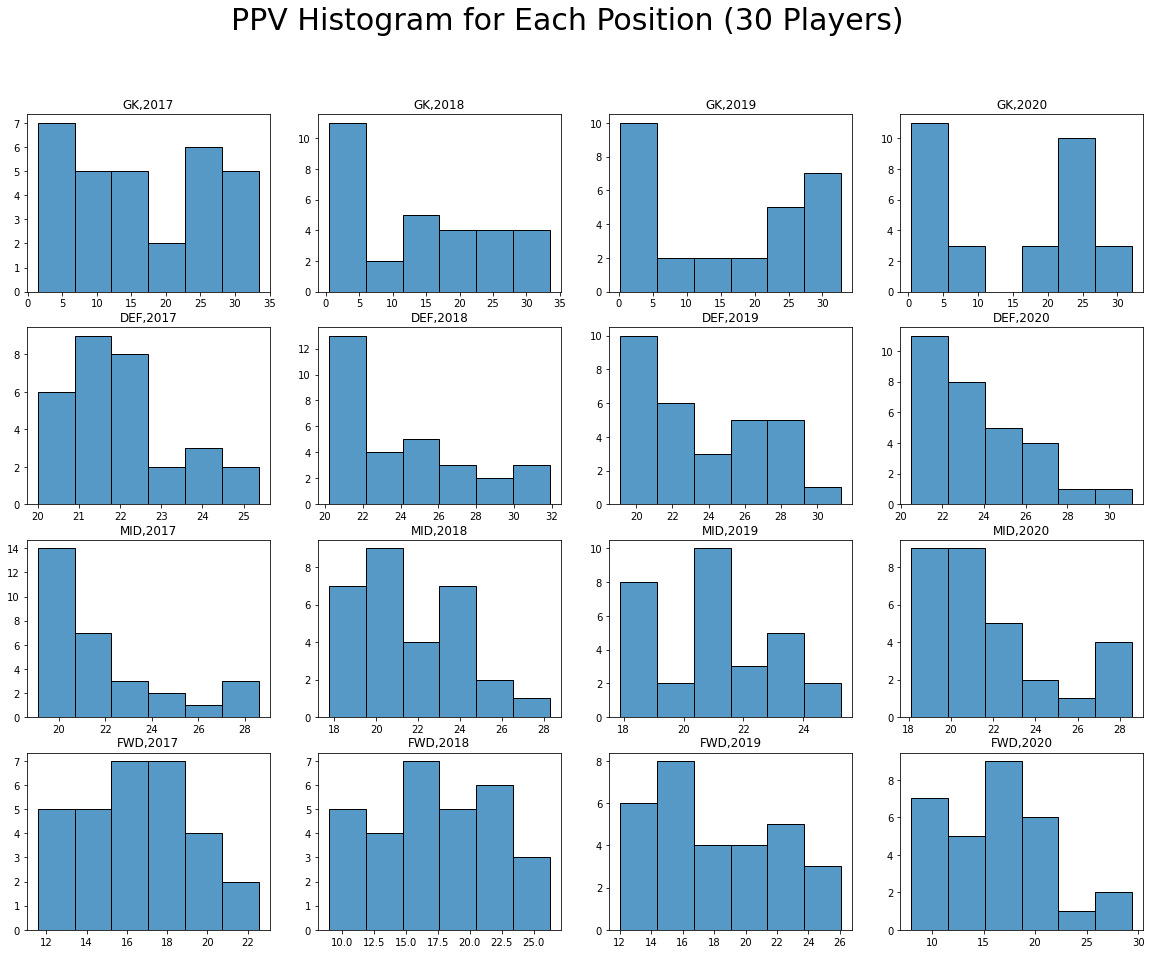

In [9]:
#PPV Histogram


position = ['GK','DEF','MID','FWD']
years = [2017,2018,2019,2020]
step = 1

#Adding Main Fig and Main A
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
fig.suptitle('PPV Histogram for Each Position (30 Players)',fontsize=30)
plt.axis('off')

# Set common labels
ax.set_xlabel('Points Per Value', fontsize=20)
ax.set_ylabel('Count', fontsize = 20)


#Plotting subplots
for x in position:
    for y in years:
        sub_ax = fig.add_subplot(4,4,step)
        data = ppv_df.loc[(ppv_df.position==x) & (ppv_df.year==y)].ppv
        g = sns.histplot(data=data)
        g.set(title = '{},{}'.format(x,y))
        g.set(xlabel=None,ylabel=None)
        step+=1



### PPG Histogram

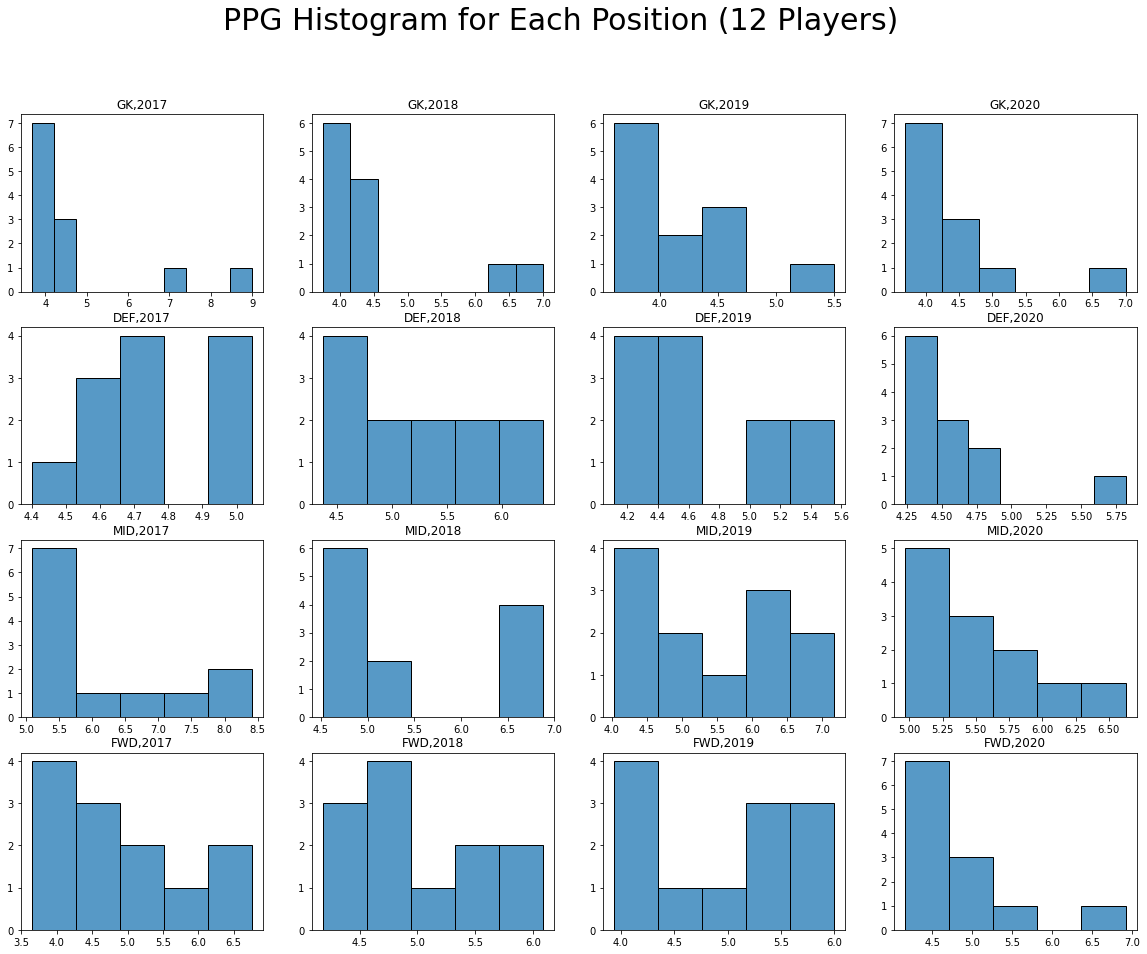

In [10]:
#PPG Histogram

position = ['GK','DEF','MID','FWD']
years = [2017,2018,2019,2020]
step = 1

#Adding Main Fig and Main A
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
fig.suptitle('PPG Histogram for Each Position (12 Players)',fontsize=30)
plt.axis('off')

# Set common labels
ax.set_xlabel('Points Per Value', fontsize=20)
ax.set_ylabel('Count', fontsize = 20)


#Plotting subplots
for x in position:
    for y in years:
        sub_ax = fig.add_subplot(4,4,step)
        data = ppg_df.loc[(ppg_df.position==x) & (ppg_df.year==y)].ppg
        g = sns.histplot(data=data)
        g.set(title = '{},{}'.format(x,y))
        g.set(xlabel=None,ylabel=None)
        step+=1



### BoxPlot (PPG and PPV):

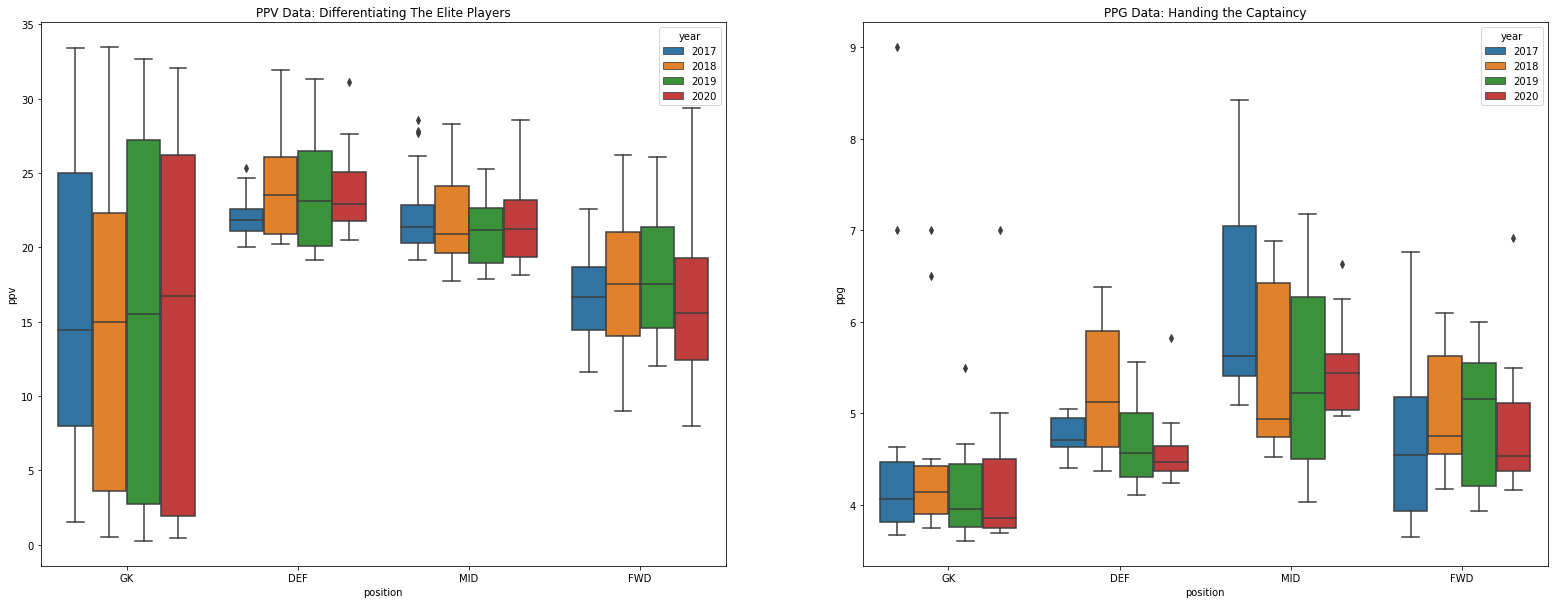

In [11]:
#BoxPlot

fig = plt.figure(figsize=(27,10))
fig.add_subplot(121)
b = sns.boxplot(x='position', y='ppv', hue='year', order = ["GK","DEF","MID","FWD"], data=ppv_df);
b.set(title = 'PPV Data: Differentiating The Elite Players')

fig.add_subplot(122)
c = sns.boxplot(x='position', y='ppg', hue='year', order = ["GK","DEF","MID","FWD"], data=ppg_df);
c.set(title = 'PPG Data: Handing the Captaincy');

#Adding Labels to Outliers - In Progress
#plt.text(0.35K3520,'test)#
#f_data=df
#f1_data.groupby(by=['year','position']).quantile(0.25)['ppv']q1 #= 1_datdfpby(by=['year','position']).quantile(0.25)['ppv'].t7_numpy()
#out#lir_top_#lim = month_q3 + 1month_q3-m#1)oubott#om_lim = month_q1 - 1month_q3-m1)
#p_lim[][11

In [32]:
#Checking...
ppg_df.loc[(ppg_df.year==2020)&(ppg_df.position=='DEF')]

,year,player_name,team_name,position,goals_scored,assists,total_points,goals_conceded,creativity,influence,...,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup,ppg
1358,2020,John Stones,Man City,DEF,4,0,128,12,79.8,520.0,...,1933,2.501299,0.046840,15,2,4,2.501299,10.388180,10.288511,5.818182
1359,2020,Antonio Rüdiger,Chelsea,DEF,1,0,93,10,83.8,368.6,...,1710,1.139936,0.305807,14,4,1,1.139936,9.137650,9.044836,4.894737
1360,2020,Benjamin Mendy,Man City,DEF,2,1,63,10,117.1,179.8,...,955,0.334141,0.301440,6,5,2,0.334141,2.769137,2.348603,4.846154
1361,2020,Kortney Hause,Aston Villa,DEF,1,0,32,6,2.2,147.0,...,630,1.303753,0.000000,5,0,1,1.303753,1.804376,1.804376,4.571429
1362,2020,Kurt Zouma,Chelsea,DEF,5,0,108,25,72.6,577.8,...,2024,3.136853,0.081467,27,4,5,3.136853,6.216146,6.133133,4.500000
1363,2020,Stuart Dallas,Leeds,DEF,8,3,171,53,454.6,756.8,...,3412,4.457074,2.084683,48,26,8,4.457074,18.534344,13.809802,4.500000
1364,2020,Trent Alexander-Arnold,Liverpool,DEF,2,8,160,40,1238.8,789.6,...,3040,2.593060,8.576368,55,77,2,2.593060,23.107881,17.648908,4.444444
1365,2020,James Justin,Leicester,DEF,2,2,101,25,290.7,472.2,...,2070,1.517483,2.059136,9,19,2,1.517483,7.665664,5.505036,4.391304
1366,2020,Marcos Alonso,Chelsea,DEF,2,1,57,13,204.1,224.2,...,962,1.824078,1.721699,22,15,2,1.824078,4.643396,2.536424,4.384615
1367,2020,César Azpilicueta,Chelsea,DEF,1,2,113,20,413.3,502.2,...,2189,0.503005,2.575494,11,27,1,0.503005,13.989243,12.338821,4.346154


# Comparing Points against Top 6 from non-top 6.

In [219]:
%whos DataFrame

Variable           Type         Data/Info
-----------------------------------------
basic_df           DataFrame                  player_name<...>\n[1803 rows x 3 columns]
clean_result       DataFrame          index first_name se<...>n[2650 rows x 21 columns]
df                 DataFrame         assists  bonus  bps <...>\n[713 rows x 68 columns]
df1                DataFrame          year           play<...>n[1803 rows x 27 columns]
df2                DataFrame          year          playe<...>n[1803 rows x 28 columns]
final_df           DataFrame         first_name  second_n<...>n[1803 rows x 35 columns]
fpl_df             DataFrame          year          playe<...>n[1803 rows x 27 columns]
join_1             DataFrame          year first_name sec<...>\n[2650 rows x 5 columns]
join_df            DataFrame         first_name second_na<...>n[2654 rows x 24 columns]
matches_clean      DataFrame        player_name  year tea<...>\n[129 rows x 23 columns]
matches_df         DataFrame        

In [340]:
#Use 647 - Harry Kane as an example. 
#Use 1250 - Mohammed Salah ID
#755 - Vardy ID
#453 - Son Heung-Min
matches = understat.get_player_data(453)[0] ## Return MatchesData: index 0 
player_name = understat.get_player_data(453)[1][1]['player']


#Get column names
columns = list(matches[0].keys()) #Change dictionary of keys to list.
columns.append('name')

In [356]:
##DEF
matches_list = []
for match in matches: 
    match['name'] = player_name
    matches_list.append(list(match.values()))

matches_df = pd.DataFrame(matches_list,columns=columns)


In [343]:
matches_df['season'] = matches_df['season'].astype('int64')
matches_df.columns

Index(['goals', 'shots', 'xG', 'time', 'position', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'id', 'season', 'roster_id', 'xA',
       'assists', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'name'],
      dtype='object')

In [344]:
#Definition 
#understat.get_player_data(647)[2]['season'][0]['team']
basic_df = fpl_df[['player_name','year','team_title']]


In [408]:
#matches_df
#fpl_df
fpl_df[fpl_df.player_name.str.contains('Davies')]
fpl_df[(fpl_df.team_title=='Manchester United')&(fpl_df.year==2020)].player_name.unique

#player_name Son Heung-Min

<bound method Series.unique of 1363        Marcus Rashford
1380      Aaron Wan-Bissaka
1415              Luke Shaw
1416          Harry Maguire
1442        Mason Greenwood
1448        Victor Lindelöf
1459         Edinson Cavani
1474             Paul Pogba
1475        Scott McTominay
1477           David de Gea
1510        Anthony Martial
1595         Dean Henderson
1601           Daniel James
1627          Nemanja Matic
1636      Donny van de Beek
1637              Juan Mata
1641            Eric Bailly
1701         Anthony Elanga
1725          Axel Tuanzebe
1732       Brandon Williams
1764        Shola Shoretire
1785        Hannibal Mejbri
1790           William Fish
1794           Odion Ighalo
1799    Timothy Fosu-Mensah
Name: player_name, dtype: object>

In [400]:
fpl_df

,year,player_name,team_title,position,goals_scored,assists,total_points,goals_conceded,creativity,influence,...,games,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup
0,2017,Mohamed Salah,Liverpool,MID,32,12,303,29,942.5,1496.2,...,36,2954,25.136503,8.344478,143,62,31,23.614165,35.301465,5.898578
1,2017,Raheem Sterling,Manchester City,MID,18,17,229,23,838.2,969.8,...,33,2594,18.829967,8.844116,87,55,17,18.068798,33.656717,12.149657
2,2017,Harry Kane,Tottenham,FWD,29,2,217,34,502.1,1214.4,...,37,3094,26.859891,3.820441,183,34,28,24.576384,28.515266,7.961634
3,2017,Kevin De Bruyne,Manchester City,MID,8,18,209,22,1744.2,1146.6,...,37,3103,5.401730,13.101720,93,105,8,5.401730,33.500915,22.899964
4,2017,Christian Eriksen,Tottenham,MID,11,10,199,33,1487.0,1072.6,...,37,3239,7.245939,11.893049,96,95,10,7.245939,27.006113,15.511445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,2020,Fikayo Tomori,Chelsea,DEF,0,0,0,2,0.1,26.6,...,1,43,0.000000,0.000000,0,0,0,0.000000,0.072728,0.072728
1799,2020,Timothy Fosu-Mensah,Manchester United,DEF,0,0,0,2,30.5,17.8,...,1,85,0.015449,0.305152,1,2,0,0.015449,0.401905,0.360822
1800,2020,Neil Taylor,Aston Villa,DEF,0,0,-1,2,0.7,0.8,...,1,13,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
1801,2020,Alexandre Jankewitz,Southampton,MID,0,0,-1,9,0.3,4.4,...,2,2,0.000000,0.000000,0,0,0,0.000000,0.092009,0.092009


In [345]:
matches_df=pd.merge(matches_df,basic_df,how='inner',left_on=['name','season'],right_on=['player_name','year'])
##RUN ONCE

In [346]:
def opposition(x,y,z):
    if z == x:
        return y
    else:
        return x

matches_df['opponent'] =matches_df.apply(lambda x: opposition(x['h_team'],x['a_team'],x['team_title']),axis = 1)


#Rearrange the columns
cols = matches_df.columns.tolist()
cols = cols[-4:] + cols[:-4]

matches_df =  matches_df[cols]

matches_df_clean=matches_df.drop(['name'],axis=1)

ValueError: Wrong number of items passed 24, placement implies 1

In [336]:
Top4 = ['Manchester City','Manchester United','Liverpool','Chelsea']

def top6(team_name):
    if team_name in Top4:
        return 'Top4'
    else:
        return 'Not Top4'

matches_df_clean['opp_rank'] = matches_df_clean.apply(lambda x: top6(x['opponent']),axis=1)

In [337]:
matches_df_clean['goals'] = matches_df_clean['goals'].astype('int64')
matches_df_clean['xG'] = matches_df_clean['xG'].astype('float64')
matches_df_clean['assists'] = matches_df_clean['assists'].astype('int64')
matches_df_clean.groupby(by=['opp_rank']).agg(['mean'])[['goals','xG','assists']]

,goals,xG,assists
,mean,mean,mean
opp_rank,,,
Not Top4,0.491071,0.472311,0.196429
Top4,0.260870,0.208180,0.000000


In [338]:
matches_2years = matches_df_clean.loc[(matches_df_clean.year==2019) | (matches_df_clean.year==2020)]
matches_2years.groupby(by=['opp_rank']).agg(['mean'])[['goals','xG','assists']]


,goals,xG,assists
,mean,mean,mean
opp_rank,,,
Not Top4,0.448276,0.464685,0.241379
Top4,0.250000,0.204527,0.000000


In [339]:
matches_2years

,player_name,year,team_title,opponent,goals,shots,xG,time,position,h_team,...,season,roster_id,xA,assists,key_passes,npg,npxG,xGChain,xGBuildup,opp_rank
0,Sadio Mané,2020,Liverpool,Crystal Palace,2,3,0.908702,90,FWL,Liverpool,...,2020,473374,0.20294632017612457,0,3,2,0.9087020754814148,0.5022644400596619,0.1351298987865448,Not Top4
1,Sadio Mané,2020,Liverpool,Burnley,0,3,0.790442,90,FWL,Burnley,...,2020,472564,0.34078702330589294,1,4,0,0.7904424667358398,1.602820634841919,0.5577560067176819,Not Top4
2,Sadio Mané,2020,Liverpool,West Bromwich Albion,0,2,0.437599,90,FWL,West Bromwich Albion,...,2020,471495,0.07560661435127258,1,2,0,0.4375988245010376,0.5951226949691772,0.11321979761123657,Not Top4
3,Sadio Mané,2020,Liverpool,Manchester United,0,0,0.000000,12,Sub,Manchester United,...,2020,470606,0,0,0,0,0,0,0,Top4
4,Sadio Mané,2020,Liverpool,Southampton,1,2,0.646274,90,FWL,Liverpool,...,2020,469001,0.8062372207641602,0,3,1,0.646273672580719,1.5144327878952026,0.42224618792533875,Not Top4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Sadio Mané,2019,Liverpool,Newcastle United,2,4,0.825958,90,FW,Liverpool,...,2019,348741,0.11071065068244934,0,2,2,0.825958251953125,1.4207556247711182,0.5004373788833618,Not Top4
66,Sadio Mané,2019,Liverpool,Burnley,1,2,0.371333,86,FWL,Burnley,...,2019,347700,0.06001817062497139,0,1,1,0.37133294343948364,0.43135109543800354,0,Not Top4
67,Sadio Mané,2019,Liverpool,Arsenal,0,3,0.275690,79,FWL,Liverpool,...,2019,344241,0.3041730225086212,0,4,0,0.2756902575492859,0.9469189047813416,0.5676956176757812,Not Top4
68,Sadio Mané,2019,Liverpool,Southampton,1,2,0.294753,90,FWL,Southampton,...,2019,341809,0.878260612487793,1,5,1,0.29475340247154236,0.9279070496559143,0.08118458092212677,Not Top4


# 4. Conclusion

### Based from boxplot analysis for PPV (points generated per value): the median for ppv is consistently high for defenders. The boxes are smaller, so they tend to generate a more consistent PPV, as compared to other positions. Forwards have the lowest floor, as well as its median - meaning they are not worth their values as compared to other positions. 

### Based from boxplot analysis for PPG (points generated per game): Points generated by GK are consistent and have a low variation. Points generated per game by MIDs are the highest, which means they have the highest potential to give more points. Captaining them will give us even more points as compared to other positions, irregardless of their price. In addition, DEFs, even though they are cost-efficient, do not generate that much PPG, meaning they're 2nd least for captaincy. Finally, FWDS again consistently rank lower than MIDs, which means MIDs have the most potential. This could also mean that the goal scored by FWDs being recorded as 4 pts instead of 5 (for MIDs) have a significant impact to the number of points generated. 